In [4]:
from ultralytics import YOLO
from PIL import Image

model = YOLO("best.pt")
results = model.predict(["input/1.jpg", "input/2.jpg", "input/3.jpg"])


0: 640x640 1 Car, 2 Vehicle-registration-plates, 1: 640x640 1 Car, 1 Vehicle-registration-plate, 2: 640x640 2 Cars, 1 Vehicle-registration-plate, 209.0ms
Speed: 3.7ms preprocess, 69.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


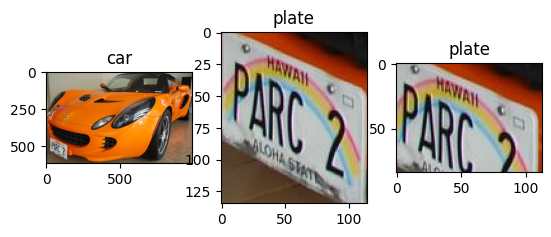

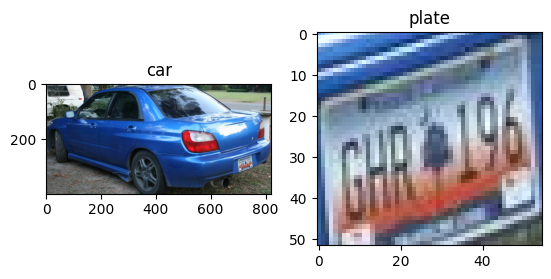

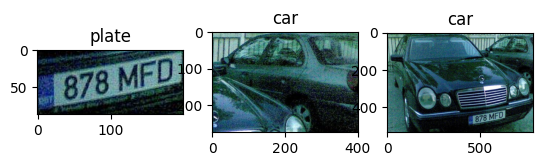

In [75]:
import numpy as np
from matplotlib import pyplot as plt

for result in results:
    image = Image.open(result.path)
    boxes = result.boxes.xyxy
    f, plots = plt.subplots(1,len(boxes))
    labels_arr = result.boxes.cls.numpy()
    position = 0
    
    for box in boxes:
        bounding_box = box.numpy()
        cropped_image = image.crop(bounding_box)
        
        if labels_arr[position] == 0:
            plots[position].set_title("car")
        else:
            plots[position].set_title("plate")
        
        plots[position].imshow(cropped_image)
        position += 1